# Importing The Required Libraries.

In [114]:
!pip install sweetviz

     |████████████████████████████████| 325 kB 598 kB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [119]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import math
import random
import seaborn as sns
import sweetviz as sv
from IPython.display import Image
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import missingno as msno
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics, pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score


from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from time import time
# models
from sklearn.linear_model import LogisticRegression, LogisticRegression, Perceptron, RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [66]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')
submit=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Lets see the number of missing values in the data.

In [67]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

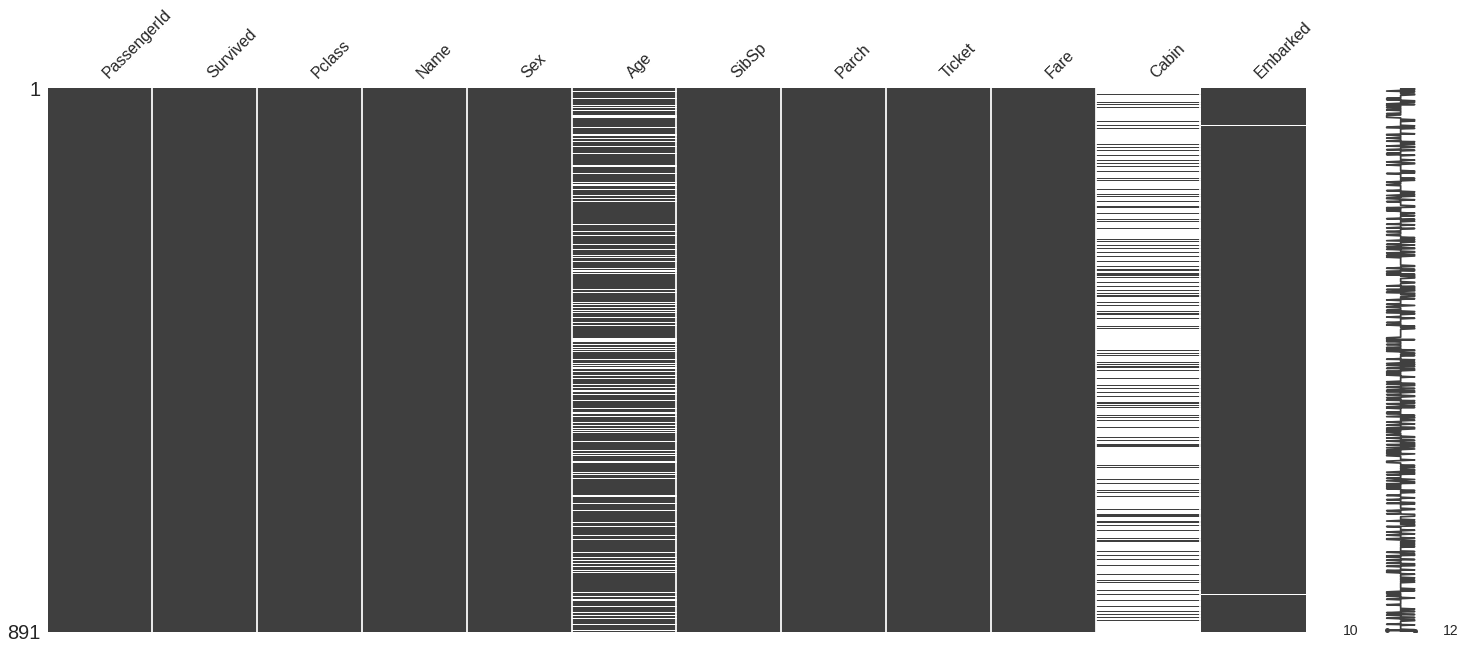

In [68]:
msno.matrix(train)

We can see that Age, Embarked and cabin  columns have a lot of missing values. now, lets check missing values for test data.

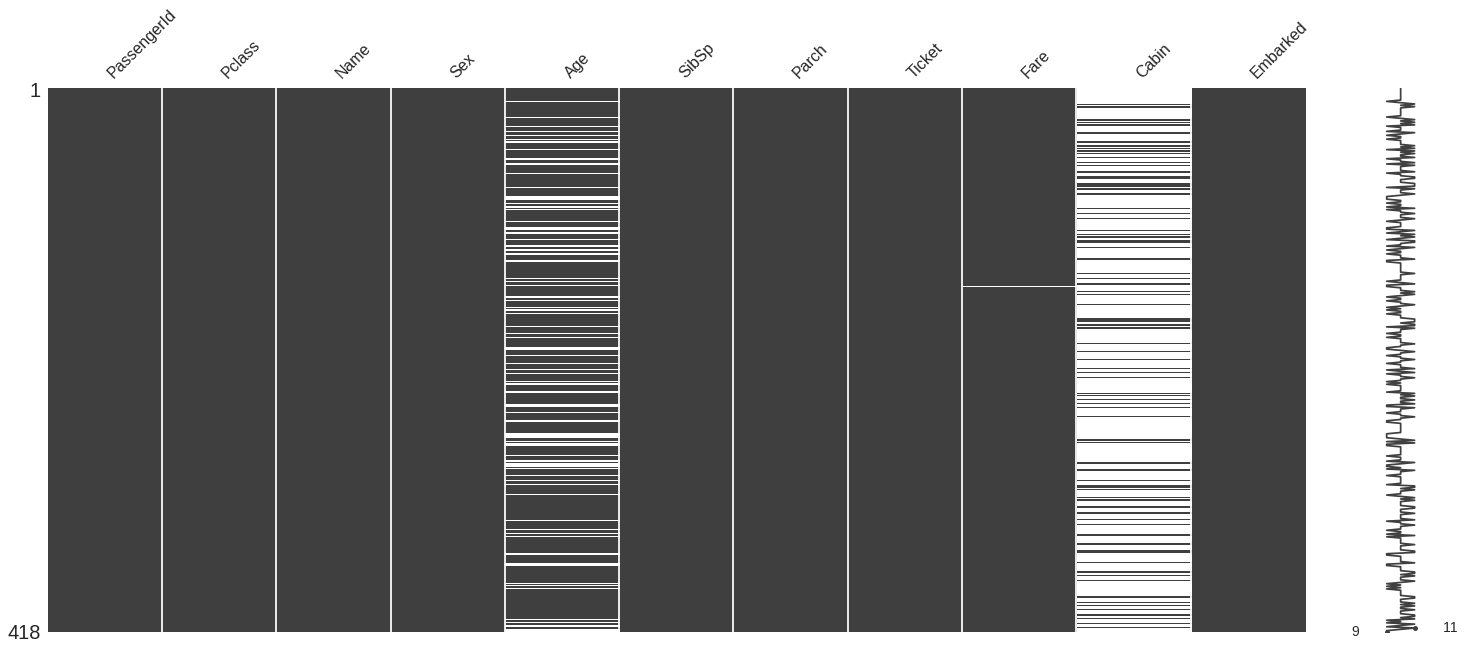

In [69]:
msno.matrix(test)

cabin, age and fare columns have a lot of missing values in test data.

### Lets Deal with these missing values first. 

In [70]:
dataset = [train,test]

for data in dataset:
    # coplete missing age with median
    data['Age'].fillna(data['Age'].median(),inplace = True)
    
    # complete Embarked with mode
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)
    
    # complete missing Fare with median
    data['Fare'].fillna(data['Fare'].median(),inplace = True)

In [71]:
print("Train info:")
print(train.isnull().sum())
print()
print()
print("Test info:")
print(test.isnull().sum())

Train info:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


Test info:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


The Cabin column has more than 75% missing values,so we are going to drop that column along with passenger id column because it is not needed.

In [72]:
train.drop(['Cabin','PassengerId'], axis=1, inplace = True)
test.drop(['Cabin','PassengerId'],axis=1,inplace=True)

In [73]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Final check of missing values.

In [74]:
print("Train info:")
print(train.isnull().sum())
print()
print()
print("Test info:")
print(test.isnull().sum())

Train info:
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


Test info:
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


# EDA using Pandas Profiling and then seaborn.

In [75]:
report=pp.ProfileReport(train)

In [76]:
report

# EDA using Sweetviz

In [116]:
#analyzing the dataset
analysis=sv.analyze(train)

:FEATURES DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [117]:
analysis.show_html('train_analysis.html')

Report train_analysis.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Check the output files for the eda report.

## EDA of Numeric Variables.

In [77]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

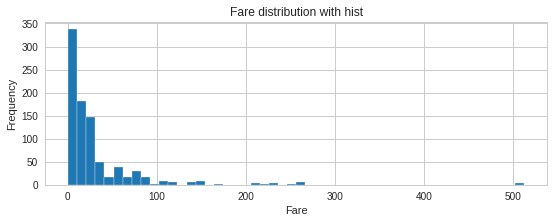

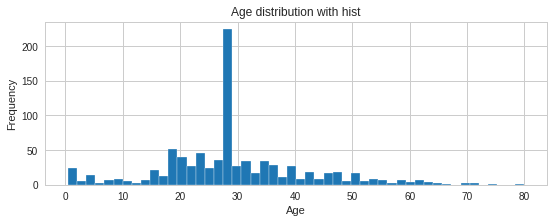

In [78]:
numVar = ["Fare", "Age"]
for n in numVar:
    plot_hist(n)

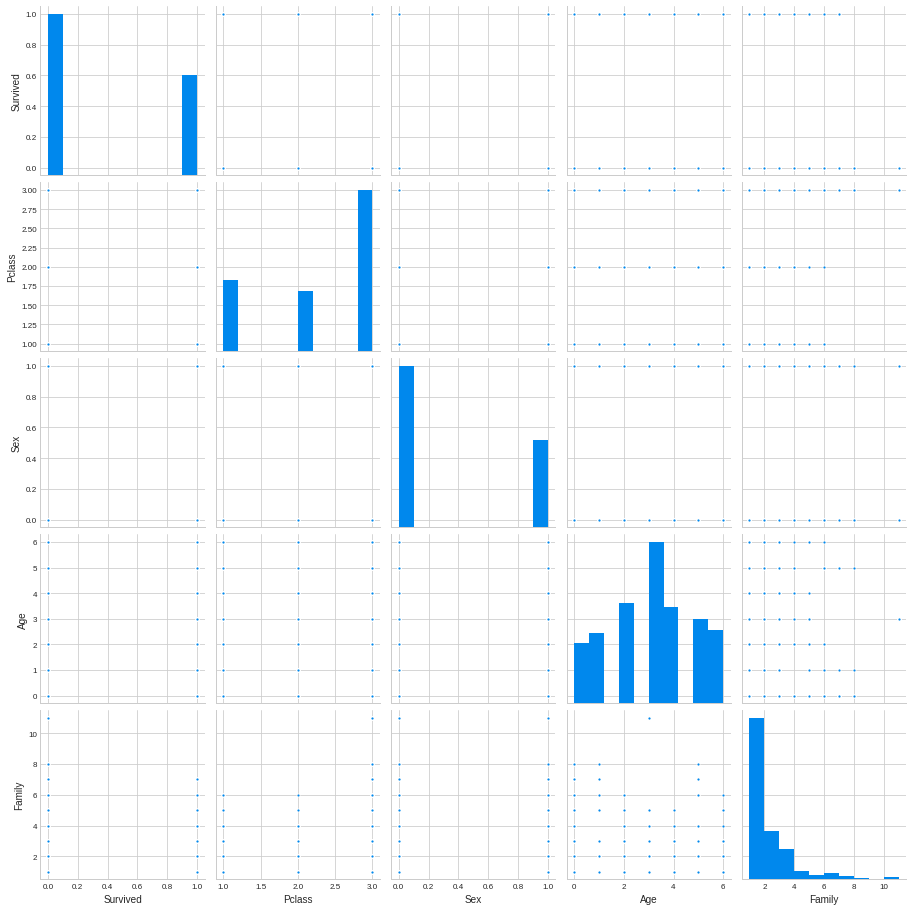

In [121]:
sns.pairplot(train)
plt.show()

### Plotting Correlation Heatmap

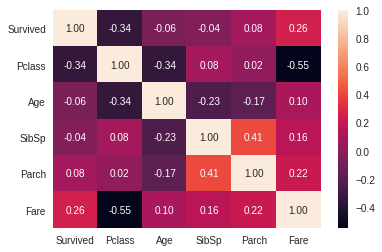

In [79]:
sns.heatmap(train.corr(), annot = True, fmt = ".2f")
plt.show()

## Features Survival Statistics

### SibSp & Survived

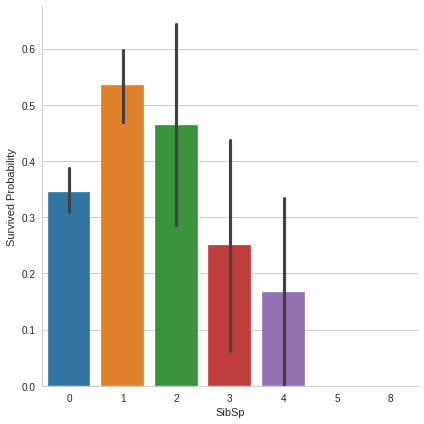

In [80]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = train, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

- Having a lot of SibSp have less chance to survive.
- if sibsp == 0 or 1 or 2, passenger has more chance to survive

### Parch & Survived

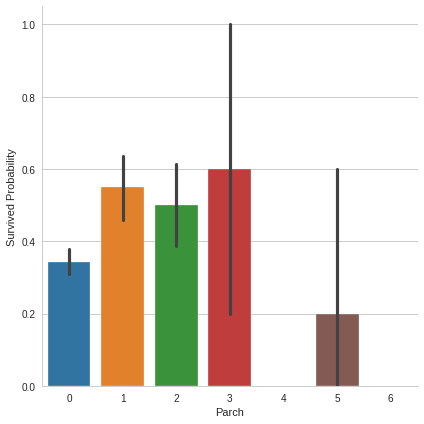

In [81]:
g = sns.factorplot(x = "Parch", y = "Survived", kind = "bar", data = train, size = 6)
g.set_ylabels("Survived Probability")
plt.show()

### Age & Survived

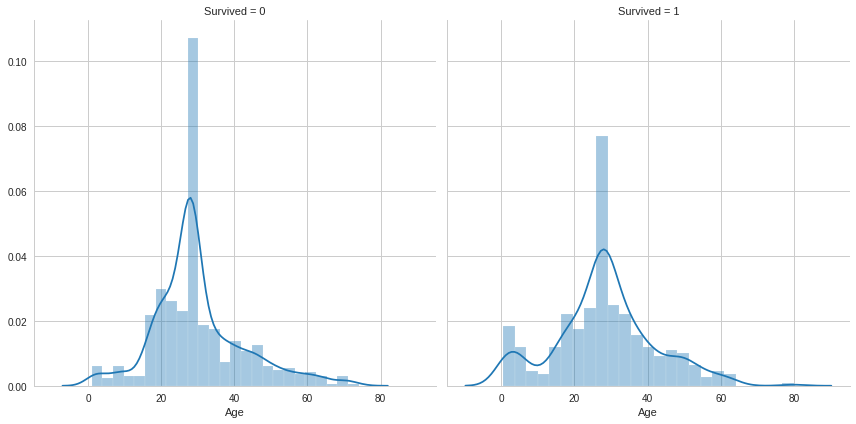

In [82]:
g = sns.FacetGrid(train, col = "Survived",size=6)
g.map(sns.distplot, "Age", bins = 25)
plt.show()

- age <= 10 has a high survival rate,
- oldest passengers (80) survived,
- large number of 20 years old did not survive,
- most passengers are in 15-35 age range,

# Feature Selection and model building.

We can use Embarked as feature here for getting high accuracy but logically its doesn't matter. so we drop it out.

In [83]:
train.drop(['Embarked'], axis=1, inplace = True)
test.drop(['Embarked'],axis=1,inplace=True)

In [84]:
genders = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(genders)
test['Sex'] = test['Sex'].map(genders)
train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [88]:
for data in dataset:
    data['Age'] = data['Age'].astype(int)
    data.loc[ data['Age'] <= 15, 'Age'] = 0
    data.loc[(data['Age'] > 15) & (data['Age'] <= 20), 'Age'] = 1
    data.loc[(data['Age'] > 20) & (data['Age'] <= 26), 'Age'] = 2
    data.loc[(data['Age'] > 26) & (data['Age'] <= 28), 'Age'] = 3
    data.loc[(data['Age'] > 28) & (data['Age'] <= 35), 'Age'] = 4
    data.loc[(data['Age'] > 35) & (data['Age'] <= 45), 'Age'] = 5
    data.loc[ data['Age'] > 45, 'Age'] = 6
train['Age'].value_counts()

3    222
2    139
4    133
5    116
6    101
1     97
0     83
Name: Age, dtype: int64

In [91]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,71.2833
2,1,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4,1,0,113803,53.1000
4,0,3,"Allen, Mr. William Henry",0,4,0,0,373450,8.0500


### Creating new feature Family Size as a combination of SibSp and Parch

In [92]:
for data in dataset:
    data['Family'] = data['SibSp'] + data['Parch'] + 1
train.head()    

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Family
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,71.2833,2
2,1,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,7.9250,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4,1,0,113803,53.1000,2
4,0,3,"Allen, Mr. William Henry",0,4,0,0,373450,8.0500,1


As we created new fetures form existing one, so we remove the old ones.

Dropping SibSp & Parch because we have family now. same way Age. We also going to remove some other features like  Ticket number and Name.

In [93]:
for data in dataset:
    drop_column = ['Fare','Name','Ticket','SibSp','Parch']
    data.drop(drop_column, axis=1, inplace = True)

### Final check of train and test set.

In [98]:
train.head()

,Survived,Pclass,Sex,Age,Family
0,0,3,0,2,2
1,1,1,1,5,2
2,1,3,1,2,1
3,1,1,1,4,2
4,0,3,0,4,1


In [95]:
test.head()

,Pclass,Sex,Age,Family
0,3,0,4,1
1,3,1,6,2
2,2,0,6,1
3,3,0,3,1
4,3,1,2,3


# Splitting The data into train and test set.

In [99]:
X_train,X_val,y_train,y_val=train_test_split(train.iloc[:,1:],train['Survived'],test_size=0.2,random_state=2)

## Creating a Custom function to compare accuracies of all models.

In [100]:
def acc_summary(pipeline, X_train, y_train, X_val, y_val):
    t0 = time()
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_val)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_val, y_pred)*100
    print("accuracy : {0:.2f}%".format(accuracy))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time


In [136]:
names = [ 
        'Logistic Regression',
        'Ridge Classifier',
        'SGD Classifier',
        'SVC',
        'Gradient Boosting Classifier', 
        'Extra Trees Classifier', 
        "Bagging Classifier",
        "AdaBoost Classifier", 
        "K Nearest Neighbour Classifier",
         "Decison Tree Classifier",
         "Random Forest Classifier",
         'GaussianNB',
        "Gaussian Process Classifier",
        "MLP Classifier",
        "XGB Classifier",
        "LGBM Classifier"
         ]
classifiers = [
    LogisticRegression(),
    RidgeClassifier(),
    SGDClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(), 
    BaggingClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(max_depth=3),
    RandomForestClassifier(n_estimators=100),
    GaussianNB(),
    GaussianProcessClassifier(),
    MLPClassifier(),
    XGBClassifier(booster= 'dart', max_depth=2,n_estimators=500),
    LGBMClassifier()
        ]

zipped_clf = zip(names,classifiers)

In [137]:
def classifier_comparator(X_train,y_train,X_val,y_val,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print(c)
        clf_acc,tt_time = acc_summary(checker_pipeline,X_train, y_train, X_val, y_val)
        result.append((n,clf_acc,tt_time))
    return result

# Judgement Time,all eyes on last two classifiers.

In [138]:
classifier_comparator(X_train,y_train,X_val,y_val)

Validation result for Logistic Regression
LogisticRegression()
accuracy : 78.21%
train and test time: 0.02s
--------------------------------------------------------------------------------
Validation result for Ridge Classifier
RidgeClassifier()
accuracy : 76.54%
train and test time: 0.01s
--------------------------------------------------------------------------------
Validation result for SGD Classifier
SGDClassifier()
accuracy : 67.60%
train and test time: 0.01s
--------------------------------------------------------------------------------
Validation result for SVC
SVC()
accuracy : 79.89%
train and test time: 0.02s
--------------------------------------------------------------------------------
Validation result for Gradient Boosting Classifier
GradientBoostingClassifier()
accuracy : 78.21%
train and test time: 0.10s
--------------------------------------------------------------------------------
Validation result for Extra Trees Classifier
ExtraTreesClassifier()
accuracy : 75.98%

[('Logistic Regression', 78.2122905027933, 0.017717599868774414),
 ('Ridge Classifier', 76.53631284916202, 0.007494211196899414),
 ('SGD Classifier', 67.59776536312849, 0.00914764404296875),
 ('SVC', 79.88826815642457, 0.018568038940429688),
 ('Gradient Boosting Classifier', 78.2122905027933, 0.10187482833862305),
 ('Extra Trees Classifier', 75.97765363128491, 0.2015399932861328),
 ('Bagging Classifier', 76.53631284916202, 0.03793668746948242),
 ('AdaBoost Classifier', 78.77094972067039, 0.12381434440612793),
 ('K Nearest Neighbour Classifier', 78.77094972067039, 0.015094280242919922),
 ('Decison Tree Classifier', 78.77094972067039, 0.009340763092041016),
 ('Random Forest Classifier', 78.77094972067039, 0.27287912368774414),
 ('GaussianNB', 76.53631284916202, 0.00672459602355957),
 ('Gaussian Process Classifier', 77.6536312849162, 0.1588444709777832),
 ('MLP Classifier', 78.77094972067039, 0.7936513423919678),
 ('XGB Classifier', 78.77094972067039, 0.9253551959991455),
 ('LGBM Classifi

### Selecting Random Forest for final prediction.

In [139]:
model=RandomForestClassifier(n_estimators=200)
model.fit(train.iloc[:,1:],train['Survived'])
y_pred=model.predict(test)

# Creating submission file.

In [141]:
submit['Survived']=y_pred

In [143]:
#submit.to_csv('submission_file.csv',index=False)

# Thankyou For Reading and Upvote If you Liked my notebook !!!